In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import datetime as dt
pd.set_option("display.max_columns",None)

In [2]:
data=pd.read_csv("Covid Dataset.csv")

In [3]:
data.columns=data.columns.str.lower()
data.head()

,breathing problem,fever,dry cough,sore throat,running nose,asthma,chronic lung disease,headache,heart disease,diabetes,hyper tension,fatigue,gastrointestinal,abroad travel,contact with covid patient,attended large gathering,visited public exposed places,family working in public exposed places,wearing masks,sanitization from market,covid-19
0,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,No,No,Yes
1,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,No,No,Yes,Yes,No,No,No,Yes
2,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,No,No,No,No,No,Yes
3,Yes,Yes,Yes,No,No,Yes,No,No,Yes,Yes,No,No,No,Yes,No,Yes,Yes,No,No,No,Yes
4,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes


In [4]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [5]:
for i in data.columns:
    data[i]=le.fit_transform(data[i])

In [6]:
data.head()

,breathing problem,fever,dry cough,sore throat,running nose,asthma,chronic lung disease,headache,heart disease,diabetes,hyper tension,fatigue,gastrointestinal,abroad travel,contact with covid patient,attended large gathering,visited public exposed places,family working in public exposed places,wearing masks,sanitization from market,covid-19
0,1,1,1,1,1,0,0,0,0,1,1,1,1,0,1,0,1,1,0,0,1
1,1,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1
2,1,1,1,1,1,1,1,1,0,1,0,1,1,1,0,0,0,0,0,0,1
3,1,1,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0,0,1
4,1,1,1,1,1,0,1,1,1,1,1,0,1,0,1,0,1,0,0,0,1


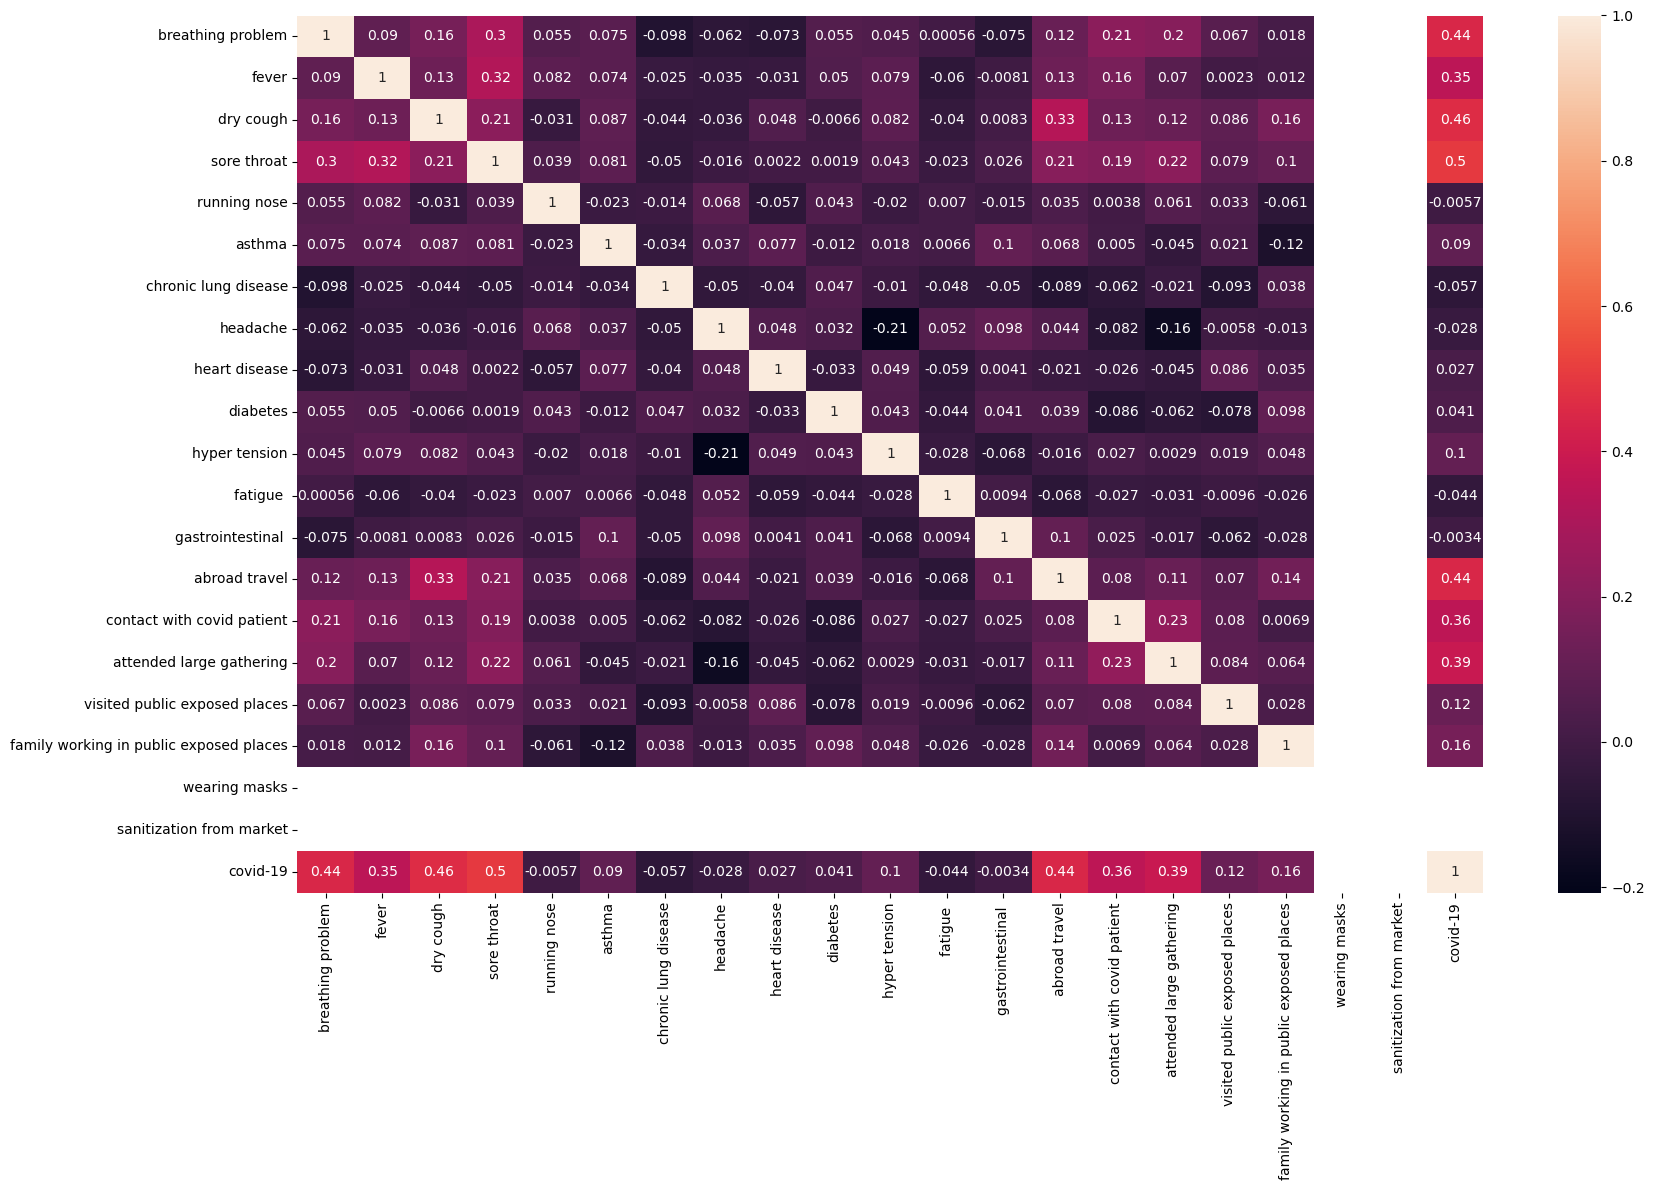

In [7]:
plt.figure(figsize=(18,12))
sns.heatmap(data.corr(),annot=True,)
plt.tight_layout()
plt.show()

In [8]:
cor=data.corr()["covid-19"].sort_values(ascending=False).abs()[1:]
cor

sore throat                                0.502848
dry cough                                  0.464292
abroad travel                              0.443875
breathing problem                          0.443764
attended large gathering                   0.390145
contact with covid patient                 0.357122
fever                                      0.352891
family working in public exposed places    0.160208
visited public exposed places              0.119755
hyper tension                              0.102575
asthma                                     0.089930
diabetes                                   0.040627
heart disease                              0.027072
gastrointestinal                           0.003367
running nose                               0.005657
headache                                   0.027793
fatigue                                    0.044188
chronic lung disease                       0.056837
wearing masks                                   NaN
sanitization

In [9]:
data.drop(columns=['gastrointestinal ',"running nose"],axis=1,inplace=True)

In [10]:
data.columns=data.columns.str.replace(" ","")

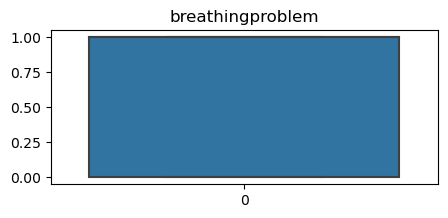

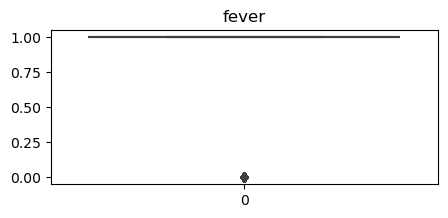

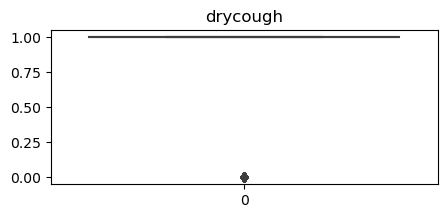

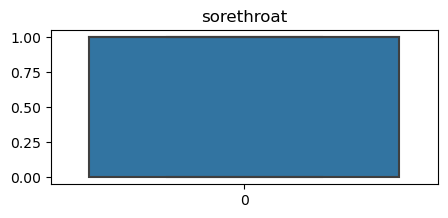

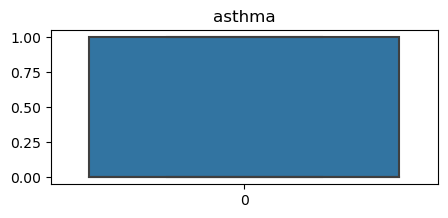

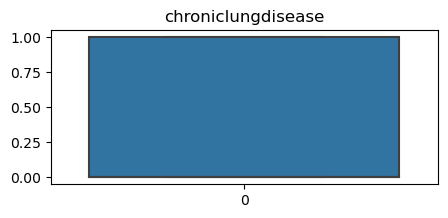

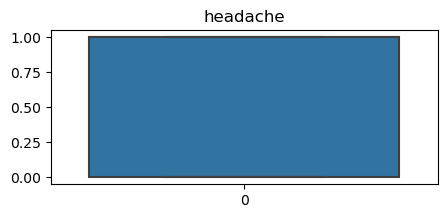

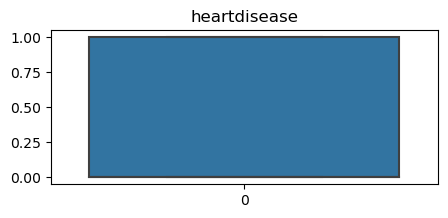

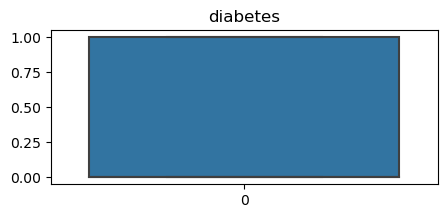

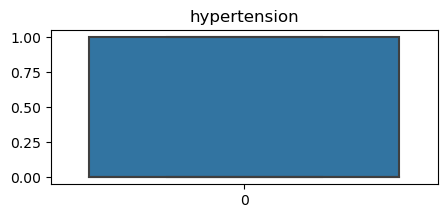

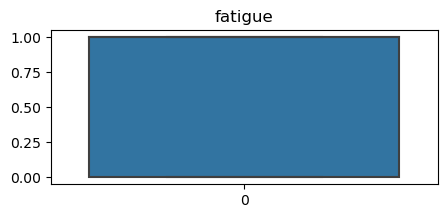

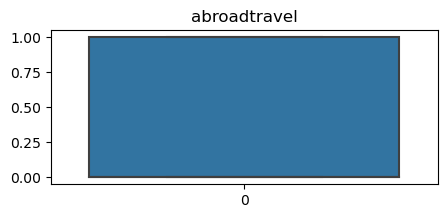

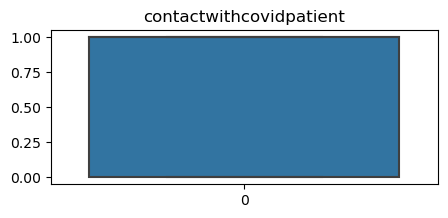

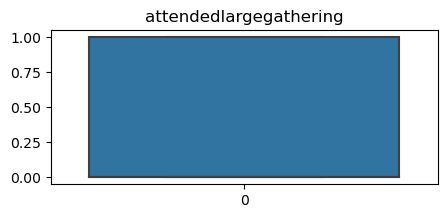

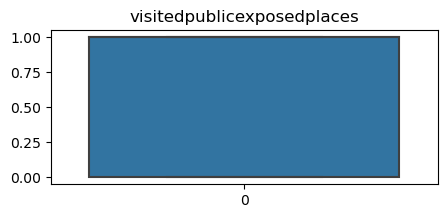

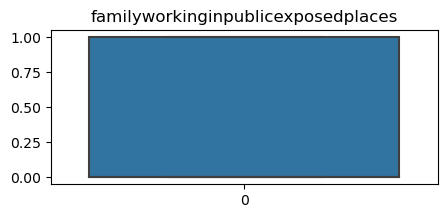

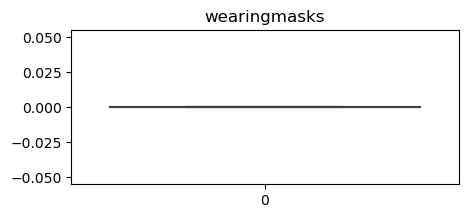

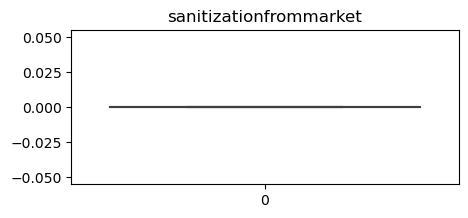

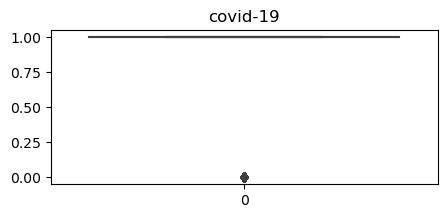

In [11]:
for i in data.columns:
    plt.figure(figsize=(5,2))
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC

In [13]:
x=data[data.columns[:-1]]
x
y=data['covid-19']

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4075, 18), (1359, 18), (4075,), (1359,))

In [24]:
rfm=RandomForestClassifier(n_estimators=100,random_state=123)
gbc=GradientBoostingClassifier(n_estimators=100,random_state=123)
dtc=DecisionTreeClassifier(random_state=123)
xg=XGBClassifier(random_state=123)
svc=SVC(random_state=123)

In [25]:
classifier={"RandomForestClassifier":rfm,
           "GradientBoostingClassifier":gbc,
           "DecisionTreeClassifier":dtc,
           "XGBClassifier":xg,
           "SVC":svc}

In [41]:
index=0
for name,model in classifier.items():
    index+=1
    print(f"{index}) Training Model in {name}")
    model.fit(x_train,y_train)
    print()
    predict=model.predict(x_test)
    accuracy=accuracy_score(y_test,predict)
    print(f"Accuracy={round(accuracy,3)}%")
    
    print(f"classification report {classification_report(y_test,predict)}")
    
    print(f"confusion matrix {confusion_matrix(y_test,predict)}")
    
    print("-"*80)

1) Training Model in RandomForestClassifier

Accuracy=0.982%
classification report               precision    recall  f1-score   support

           0       0.95      0.96      0.95       257
           1       0.99      0.99      0.99      1102

    accuracy                           0.98      1359
   macro avg       0.97      0.97      0.97      1359
weighted avg       0.98      0.98      0.98      1359

confusion matrix [[ 246   11]
 [  14 1088]]
--------------------------------------------------------------------------------
2) Training Model in GradientBoostingClassifier

Accuracy=0.979%
classification report               precision    recall  f1-score   support

           0       0.95      0.95      0.95       257
           1       0.99      0.99      0.99      1102

    accuracy                           0.98      1359
   macro avg       0.97      0.97      0.97      1359
weighted avg       0.98      0.98      0.98      1359

confusion matrix [[ 243   14]
 [  14 1088]]
-------

In [44]:
xg.fit(x_train,y_train)
predict_xg=xg.predict(x_test)

In [46]:
accuracy_xg=accuracy_score(predict,y_test)
print("Accuracy for xg boost",accuracy)

Accuracy for xg boost 0.9816041206769683


In [48]:
classification=classification_report(predict,y_test)
print(f"classification report {classification}")

classification report               precision    recall  f1-score   support

           0       0.96      0.95      0.95       260
           1       0.99      0.99      0.99      1099

    accuracy                           0.98      1359
   macro avg       0.97      0.97      0.97      1359
weighted avg       0.98      0.98      0.98      1359



In [52]:
confusion = confusion_matrix(y_test,predict)
confusion

array([[ 246,   11],
       [  14, 1088]], dtype=int64)

In [53]:
from joblib import dump

In [54]:
dump(xg,"xg_boost_classifier.joblib")

['xg_boost_classifier.joblib']

In [56]:
data.columns

Index(['breathingproblem', 'fever', 'drycough', 'sorethroat', 'asthma',
       'chroniclungdisease', 'headache', 'heartdisease', 'diabetes',
       'hypertension', 'fatigue', 'abroadtravel', 'contactwithcovidpatient',
       'attendedlargegathering', 'visitedpublicexposedplaces',
       'familyworkinginpublicexposedplaces', 'wearingmasks',
       'sanitizationfrommarket', 'covid-19'],
      dtype='object')